<a href="https://colab.research.google.com/github/0Kyumy0/Machine_Learning_CodingDojo/blob/main/exerciseOnClassificationTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [30]:
filename = '/content/drive/MyDrive/DataScience/BasesDeDatos/cancer.csv'
df = pd.read_csv(filename)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [32]:
df['diagnosis'].value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

There is an imbalance in the data, with a higher number of benign diagnoses.

In [33]:
df['diagnosis'] = df['diagnosis'].replace({'B': 0, 'M': 1})

In [34]:
y = df['diagnosis']
X = df.drop(columns=['diagnosis', 'id'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Decision Tree Classifier

In [35]:
dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree.fit(X_train, y_train)
dec_tree_score_train = dec_tree.score(X_train, y_train)
dec_tree_score_test = dec_tree.score(X_test, y_test)
print(dec_tree_score_train)
print(dec_tree_score_test)

1.0
0.951048951048951


In [36]:
dec_tree.get_depth()

7

In [37]:
max_depth_range = list(range(2,7))

r2=[]
for depth in max_depth_range:
  dec_tree_other = DecisionTreeClassifier(max_depth = depth, random_state=42)
  dec_tree_other.fit(X_train, y_train)
  dec_tree_other_score = dec_tree_other.score(X_test, y_test)
  r2.append(dec_tree_other_score)

In [38]:
r2_max = max(r2)
r2_max_index = r2.index(r2_max)
mejor_depth_range = max_depth_range[r2_max_index]
mejor_depth_range # The optimal value for depth in the classification tree model.

3

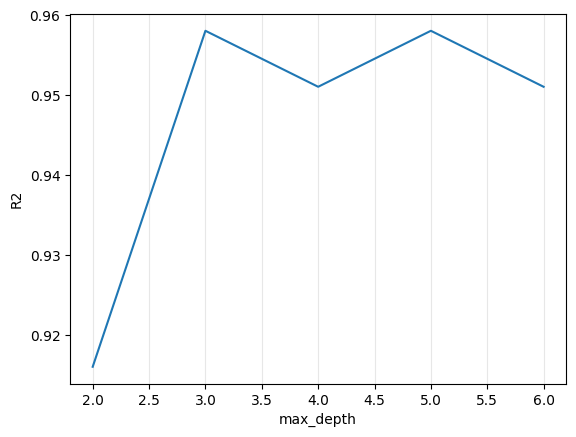

In [39]:
fig1 = plt.figure(dpi=100)
ax1 = fig1.add_subplot(1,1,1)
ax1.plot(max_depth_range, r2);
plt.xlabel('max_depth');
plt.ylabel('R2');
plt.grid(axis='x', alpha=0.3);

In [62]:
# Decision Tree Classifier with the best max_depth value for a better result in the metrics
dec_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
dec_tree.fit(X_train, y_train)
dec_tree_score_train = dec_tree.score(X_train, y_train)
dec_tree_score_test = dec_tree.score(X_test, y_test)
print((dec_tree_score_train*100).round(4))
print((dec_tree_score_test*100).round(4))

97.1831
95.8042


# Bagging Classifier

In [103]:
#bagclass = BaggingClassifier(estimator = DecisionTreeClassifier(max_depth = 14, random_state=42), random_state=42)
bagclass = BaggingClassifier(n_estimators=14, random_state=42)
bagclass.fit(X_train, y_train)
bagclass_train_score = bagclass.score(X_train, y_train)
bagclass_test_score = bagclass.score(X_test, y_test)
print((bagclass_train_score*100).round(4))
print((bagclass_test_score*100).round(4))

99.2958
95.8042


In [98]:
# Search for the optimal number of estimators.
max_estimators_range = list(range(2, 30))

r2_estimators = [] # List to store the scores for each value of estimators.
for estimator in max_estimators_range:
    bagclass_prueba = BaggingClassifier(n_estimators = estimator, random_state = 42)
    bagclass_prueba.fit(X_train, y_train)
    score =  bagclass_prueba.score(X_test, y_test)
    r2_estimators.append(score)

# searching for the highest R2 score.
for i in range(len(r2_estimators)):
    if (r2_estimators[i]==max(r2_estimators)):
        break
print("profundidad ", max_estimators_range[i])

profundidad  14


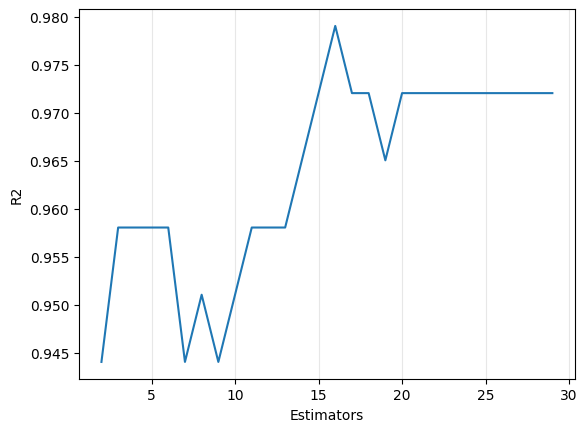

In [117]:
fig2 = plt.figure(dpi=100)
ax1 = fig2.add_subplot(1,1,1)
ax1.plot(max_estimators_range, r2_estimators);
plt.xlabel('Estimators');
plt.ylabel('R2');
plt.grid(axis='x', alpha=0.3);

# Random Forest Classifier

In [111]:
rf = RandomForestClassifier(n_estimators=16, random_state=42)
rf.fit(X_train, y_train)
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print((rf_train_score*100).round(4))
print((rf_test_score*100).round(4))

99.5305
97.9021


In [112]:
# Search for the optimal number of estimators.
max_estimators_range = list(range(2, 30))

r2_estimators = [] # List to store the scores for each value of estimators.
for estimator in max_estimators_range:
    rf_prueba = RandomForestClassifier(n_estimators = estimator, random_state = 42)
    rf_prueba.fit(X_train, y_train)
    score =  rf_prueba.score(X_test, y_test)
    r2_estimators.append(score)

# searching for the highest R2 score.
for i in range(len(r2_estimators)):
    if (r2_estimators[i]==max(r2_estimators)):
        break
print("best n_estimators ", max_estimators_range[i])

best n_estimators  16


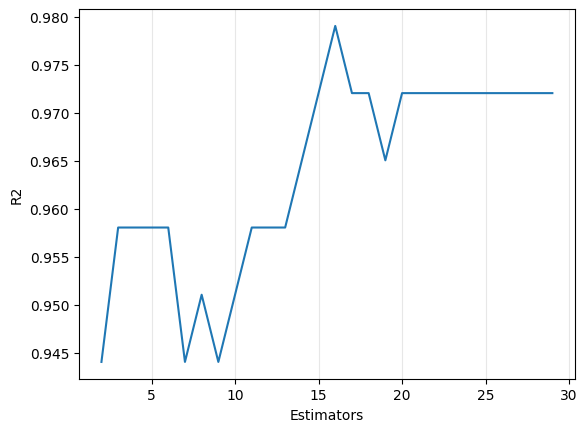

In [118]:
fig3 = plt.figure(dpi=100)
ax1 = fig3.add_subplot(1,1,1)
ax1.plot(max_estimators_range, r2_estimators);
plt.xlabel('Estimators');
plt.ylabel('R2');
plt.grid(axis='x', alpha=0.3);